In [1]:
import detectron2
import torch
import numpy as np
import cv2 
import os
import matplotlib.pyplot as plt
import matplotlib
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['figure.dpi']=100
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
from vis_det.model_pool import get_data, get_model
from vis_det.data import query_image,data_preprocessing
from detectron2.utils.visualizer import Visualizer
from vis_det.optimize import layout_optimize, layout_vis_loss

In [3]:
## load data 
coco_val, coco_val_meta = get_data("coco_2017_train")

In [7]:
## load model and corresponding arg, cfg and predictor.
model, args, cfg, predictor = get_model("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN")
# model, args, cfg, predictor = get_model("COCO-Detection/retinanet_R_50_FPN")
# model, args, cfg, predictor = get_model("COCO-Detection/faster_rcnn_R_50_FPN")

In [5]:
## load the target image layouts and show.
#target_img = "000000439715"
target_img = "000000317765"
target_image = query_image(target_img, coco_val)
print(target_image)

/home/devenish/Desktop/delight/datasets/coco/train2017/000000317765.jpg
{'file_name': '/home/devenish/Desktop/delight/datasets/coco/train2017/000000317765.jpg', 'height': 480, 'width': 640, 'image_id': 317765, 'annotations': [{'iscrowd': 0, 'bbox': [246.94, 173.46, 225.59, 130.94], 'category_id': 7, 'segmentation': [[457.58, 243.2, 452.6, 256.01, 452.6, 263.84, 452.6, 269.53, 445.49, 266.69, 439.79, 280.92, 429.12, 281.63, 421.29, 279.5, 420.58, 273.09, 414.17, 270.24, 404.92, 265.98, 397.09, 268.11, 382.86, 270.24, 379.3, 270.96, 376.46, 278.07, 372.9, 278.07, 371.48, 288.75, 367.21, 300.85, 355.82, 304.4, 342.3, 303.69, 335.89, 290.88, 334.47, 285.9, 313.12, 286.61, 304.58, 286.61, 296.04, 283.05, 295.33, 288.75, 291.77, 293.02, 281.1, 300.13, 268.29, 295.15, 262.59, 283.77, 259.75, 273.8, 247.65, 273.09, 246.94, 237.51, 265.44, 241.07, 266.86, 238.93, 270.42, 238.93, 273.27, 230.39, 274.69, 228.97, 285.37, 227.55, 308.14, 221.14, 308.14, 214.02, 306.0, 208.33, 307.43, 206.2, 310.99,

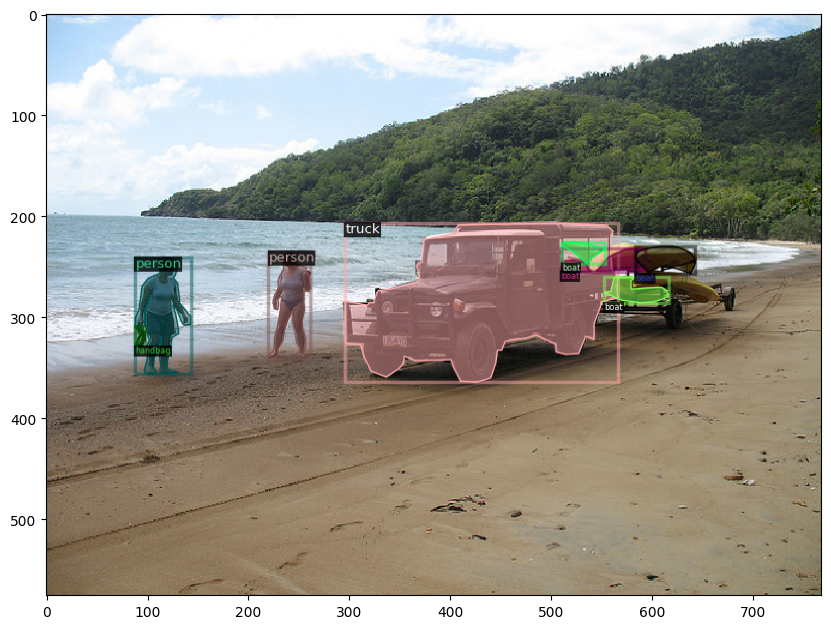

In [8]:
images, gt_instances, mapper_target = data_preprocessing(cfg,target_image,model)
img = cv2.imread(target_image["file_name"])
visualizer = Visualizer(img, metadata=coco_val_meta, scale=1.2)
vis = visualizer.draw_dataset_dict(target_image)
plt.imshow(vis.get_image()[:,:,::-1])

In [7]:
%%time
loss_func = layout_vis_loss(args)
inverter = layout_optimize(args, cfg)
x = inverter.invert(images, gt_instances, model, loss_func)

Into Invert
Mask Invert
Initialization 
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
CPU times: user 11min 53s, sys: 13.8 s, total: 12min 7s
Wall time: 3min 1s


The GPU memory usage is around 4GB.
CPU times: user 11min 53s, sys: 13.8 s, total: 12min 7s
Wall time: 3min 1s

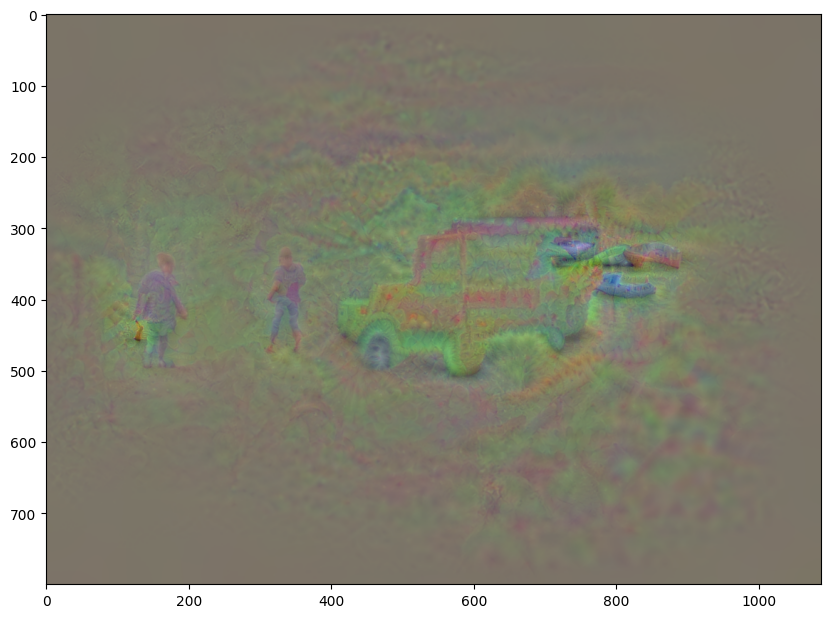

In [8]:
# draw the inverse
inverse_img = inverter.post_processing(x)
plt.imshow(inverse_img[0][:,:,::-1])

In [ ]:
## show the prediction results.
inverse_img = inverse_img[0]
outputs = predictor(inverse_img)
v1 = Visualizer(inverse_img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=0.8)
v1 = v1.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(v1.get_image())